# Projeto 1 Análise Exploratória - Cognizant-DIO

In [1]:
# Versão do Python utilizada
from platform import python_version
print(python_version())

3.7.7


In [2]:
# Importando as bibliotecas
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import locale
import warnings

In [3]:
warnings.filterwarnings('ignore')

In [4]:
# Criando o DataFrame
# Usando a opção engine = 'openpyxl' para resolver o erro XLRDError: Excel xlsx file: not supported
df = pd.read_excel("AdventureWorks.xlsx", engine = 'openpyxl')

In [5]:
# Examinando as primeiras linhas do dataframe
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
# Verificando a quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
# Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
# Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
dtype: int64

### <span style="color:blue">Como não existem dados faltantes nenhum tratamento será necessário.</span>

In [9]:
# Criando a formatação de moeda (Real)
locale.setlocale(locale.LC_MONETARY, 'pt_BR.UTF-8')

'pt_BR.UTF-8'

In [10]:
 pd.options.display.float_format = '{:20,.2f}'.format

### Qual a Margem de Lucro de cada produto?

In [11]:
dfp = df[['Produto', 'Custo Unitário', 'Preço Unitário']]
dfp = dfp.drop_duplicates()
dfp['Margem Lucro'] = ((dfp['Preço Unitário'] - dfp['Custo Unitário']) / dfp['Preço Unitário']) * 100
dfp.sort_values(by=['Produto'])

,Produto,Custo Unitário,Preço Unitário,Margem Lucro
131,Adventure Works Laptop15.4W M1548 Black,348.58,758.00,54.01
0,Adventure Works Laptop15.4W M1548 Red,348.58,758.00,54.01
93,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,330.99,999.00,66.87
42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,330.66,998.00,66.87
19,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,330.66,998.00,66.87
88,Fabrikam Trendsetter 2/3'' 17mm X100 Black,324.69,980.00,66.87
43,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,324.69,980.00,66.87
246,Headphone Adapter for Contoso Phone E130 Silver,5.09,9.99,49.05
276,Headphone Adapter for Contoso Phone E130 White,5.09,9.99,49.05


### Quais os 10 maiores clientes?

In [12]:
MC = df.groupby("ID Cliente")["Valor Venda"].sum().sort_values(ascending=False).reset_index()
MC = MC.nlargest(10, 'Valor Venda')
MC

,ID Cliente,Valor Venda
0,19052,"162,680.40"
1,19062,"148,507.50"
2,19106,"131,556.00"
3,19094,"131,448.80"
4,19053,"124,362.00"
5,19049,"120,706.56"
6,19051,"120,191.64"
7,19060,"118,829.12"
8,19057,"116,255.83"
9,19111,"109,848.12"


### Quais os 10 maiores clientes dos últimos 12 meses?

In [13]:
MCA = df.groupby("ID Cliente")["Valor Venda"].sum().sort_values(ascending=False).reset_index()[df['Data Venda'] >= (max(df['Data Venda']) - pd.DateOffset(years=1))]
MCA = MCA.nlargest(10, 'Valor Venda')
MCA

,ID Cliente,Valor Venda
11,19054,"95,838.00"
12,19068,"91,632.00"
13,19110,"89,479.30"
14,19126,"88,818.84"
15,19100,"87,373.62"
16,19070,"82,047.60"
17,19108,"80,079.20"
18,18856,"76,827.60"
28,19130,"63,169.36"
29,18819,"62,006.50"


In [14]:
df.groupby("ID Loja")["Valor Venda"].sum().sort_values(ascending=False).reset_index()

,ID Loja,Valor Venda
0,199,"2,181,104.09"
1,307,"2,079,648.44"
2,306,"1,723,853.61"


### Qual a Receita Total?

In [15]:
locale.currency(df["Valor Venda"].sum(), grouping=True)

'R$ 5.984.606,14'

### Qual o Custo?

In [16]:
#Criando a coluna de Custo
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) 


In [17]:
# Exibindo a nova coluna criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48"


### Qual o Custo Total?

In [18]:
locale.currency(df["Custo"].sum(), grouping=True)

'R$ 2.486.783,05'

### Qual o Lucro Total?

In [19]:
# Criando a coluna de Lucro que será Valor Venda - Custo
df["Lucro"]  = df["Valor Venda"] - df["Custo"] 

In [20]:
# Exibindo a nova coluna criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [21]:
# Exibindo o Lucro Total
locale.currency(df["Lucro"].sum(), grouping=True)

'R$ 3.497.823,09'

### Qual a média do tempo de envio para cada Marca?

In [22]:
# Criando a coluna Tempo Envio com total de dias para enviar o produto
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [23]:
# Exibindo a nova coluna criada
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [24]:
# Verificando o tipo da coluna Tempo Envio
df["Tempo Envio"].dtype

dtype('int64')

In [25]:
# Média do tempo de envio por Marca
MT = df.groupby("Marca")["Tempo Envio"].mean().reset_index()
MT

,Marca,Tempo Envio
0,Adventure Works,8.66
1,Contoso,8.47
2,Fabrikam,8.51


### Qual o Lucro por Ano e por Marca?

In [26]:
# Agrupando por ano e marca
LAM = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
LAM

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


### Qual o Total de Produtos Vendidos?

In [27]:
TPV = df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False).reset_index()
TPV

,Produto,Quantidade
0,Headphone Adapter for Contoso Phone E130 Silver,25232
1,Headphone Adapter for Contoso Phone E130 White,25008
2,Adventure Works Laptop15.4W M1548 Black,1089
3,Fabrikam Trendsetter 2/3'' 17mm X100 Grey,1087
4,Adventure Works Laptop15.4W M1548 Red,1047
5,Fabrikam Trendsetter 2/3'' 17mm X100 Black,926
6,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,884
7,Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,845
8,Fabrikam Trendsetter 1/3'' 8.5mm X200 White,789


## Gráficos

### Margem de Lucro

Text(0, 0.5, 'Produto')

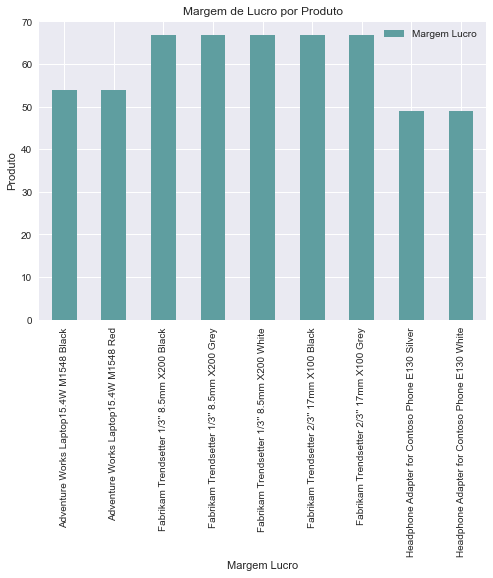

In [28]:
dfpg = dfp[['Produto', 'Margem Lucro']]
dfpg.set_index('Produto').sort_values(by=['Produto']).plot.bar(title="Margem de Lucro por Produto", color = 'cadetblue')
plt.xlabel("Margem Lucro")
plt.ylabel("Produto")

### Distribuição de Vendas por Loja

([<matplotlib.patches.Wedge at 0x1898a737d48>,
 [Text(0.45438986137020265, 1.001763372201224, '199'),
  Text(-1.0984403029561949, -0.05855681720776039, '306'),
  Text(0.5070729196864774, -0.9761542163616523, '307')],
 [Text(0.2478490152928378, 0.5464163848370313, '36.4%'),
  Text(-0.5991492561579244, -0.031940082113323845, '28.8%'),
  Text(0.27658522891989673, -0.532447754379083, '34.7%')])

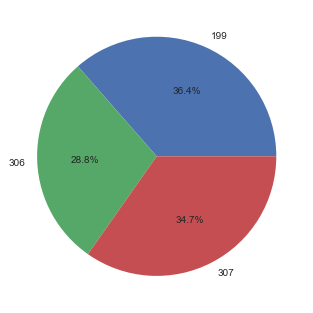

In [29]:
lbl = pd.unique(df["ID Loja"])
plt.pie(df.groupby("ID Loja")["Valor Venda"].sum(), labels = lbl, autopct='%1.1f%%')

### Total de Produtos Vendidos

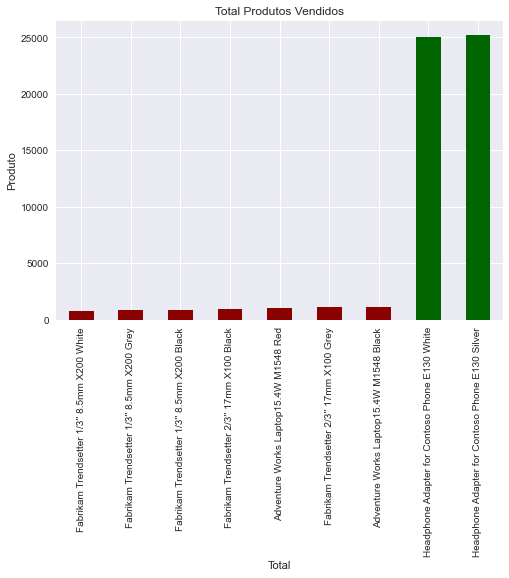

In [30]:
# Para Quantidade abaixo de 5000 mostrar as barras em vermelho e maior/igual 5000 mostrar as barras em verde
cor=(df.groupby("Produto")["Quantidade"].sum() > 5000).map({True: 'darkgreen', False: 'darkred'})
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.bar(title="Total Produtos Vendidos", color=cor)
plt.xlabel("Total")
plt.ylabel("Produto");

### Lucro por Ano

In [31]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

Text(0, 0.5, 'Receita')

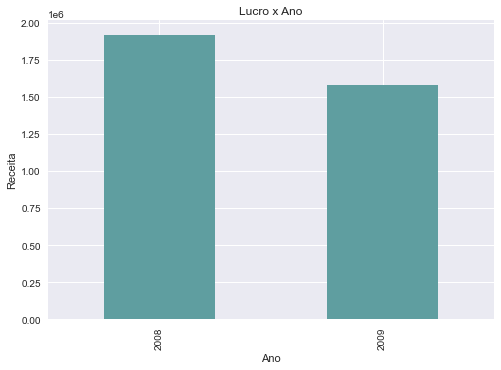

In [32]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano", color = 'cadetblue')
plt.xlabel("Ano")
plt.ylabel("Receita")

### Lucro por Mês

In [33]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]
df_2009.head(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


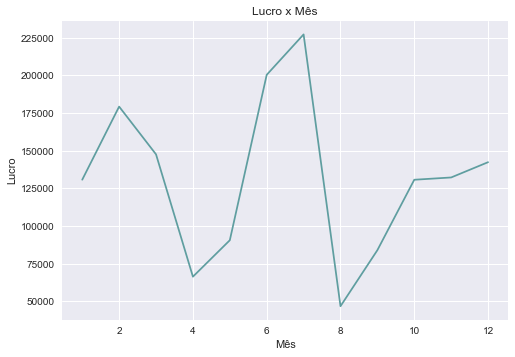

In [34]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês", color = 'cadetblue')
plt.xlabel("Mês")
plt.ylabel("Lucro");

### Lucro por Marca

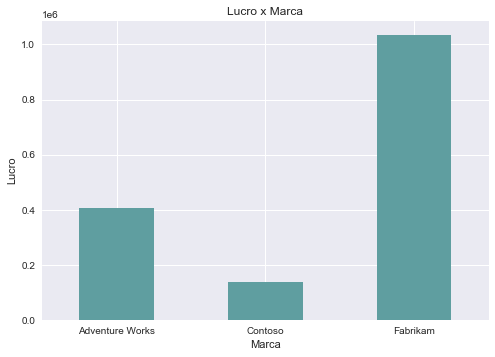

In [35]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca", color = 'cadetblue')
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

### Lucro por Classe

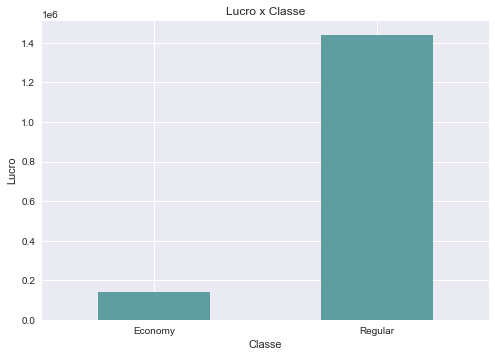

In [36]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe", color = 'cadetblue')
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

### Analisando o tempo de envio

In [37]:
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x1898b996148>,
 'caps': [<matplotlib.lines.Line2D at 0x1898b971d08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1898a922508>],
 'medians': [<matplotlib.lines.Line2D at 0x1898b9cd988>],
 'fliers': [<matplotlib.lines.Line2D at 0x1898b9cd388>],
 'means': []}

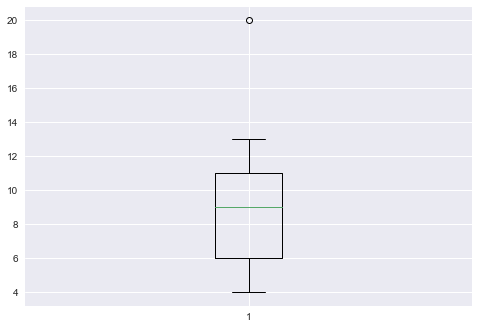

In [38]:
plt.boxplot(df["Tempo Envio"])


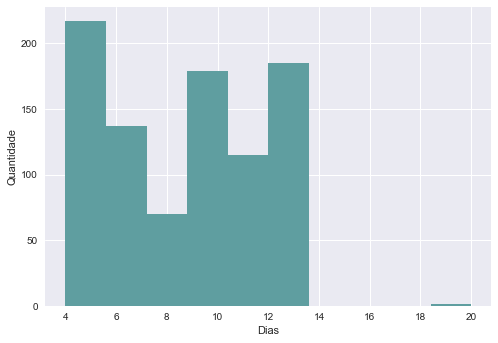

In [39]:
plt.hist(df["Tempo Envio"], color = 'cadetblue');
plt.ylabel('Quantidade')
plt.xlabel('Dias');

In [40]:
#Tempo mínimo de envio
df["Tempo Envio"].min()

4

In [41]:
#Tempo máximo de envio
df['Tempo Envio'].max()

20

In [42]:
#Identificando o Outlier
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [43]:
# Gravando em um arquivo de saída
df.to_csv("df_vendas_novo.csv", index=False)